<a href="https://colab.research.google.com/github/Arpitsinghvampire/computer_vision/blob/main/Segnet_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#first we  would import the necessary dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from keras.utils import plot_model


In [2]:
'''
def upsample_from_maxpool(input_tensor,number_of_filters,):
  upsample_layer=MaxUnpool2D()(input_tensor)
  conv_layer=Conv2D(number_of_filters,3,activation='relu',padding='same')(upsample_layer)
  return conv_layer
'''

In [8]:
import tensorflow as tf

def max_unpool_2d(tensor, ksize=(2, 2), strides=(2, 2), padding='SAME'):
    """
    Args:
        tensor: Input tensor containing both pooled values and indices in a specific format.
        ksize: Size of the window for each dimension of the input tensor.
        strides: Strides of the sliding window for each dimension of the input tensor.
        padding: Padding method used in the pooling operation.

    Returns:
        Unpooled tensor of the given output shape.
    """
    pool, indices, output_shape = tensor

    # Create a flat tensor with the values of the pooled tensor
    flat_output_shape = [output_shape[0], output_shape[1] * output_shape[2] * output_shape[3]]
    flat_input_shape = [pool.shape[0], pool.shape[1] * pool.shape[2] * pool.shape[3]]

    # Reshape pooled values and indices to flat shape
    flat_pool = tf.reshape(pool, flat_input_shape)
    flat_indices = tf.reshape(indices, flat_input_shape)

    # Create the output tensor and scatter the pooled values back into their original positions
    unpooled = tf.scatter_nd(tf.expand_dims(flat_indices, axis=-1), flat_pool, flat_output_shape)

    # Reshape the unpooled tensor to the original output shape
    unpooled = tf.reshape(unpooled, output_shape)

    return unpooled




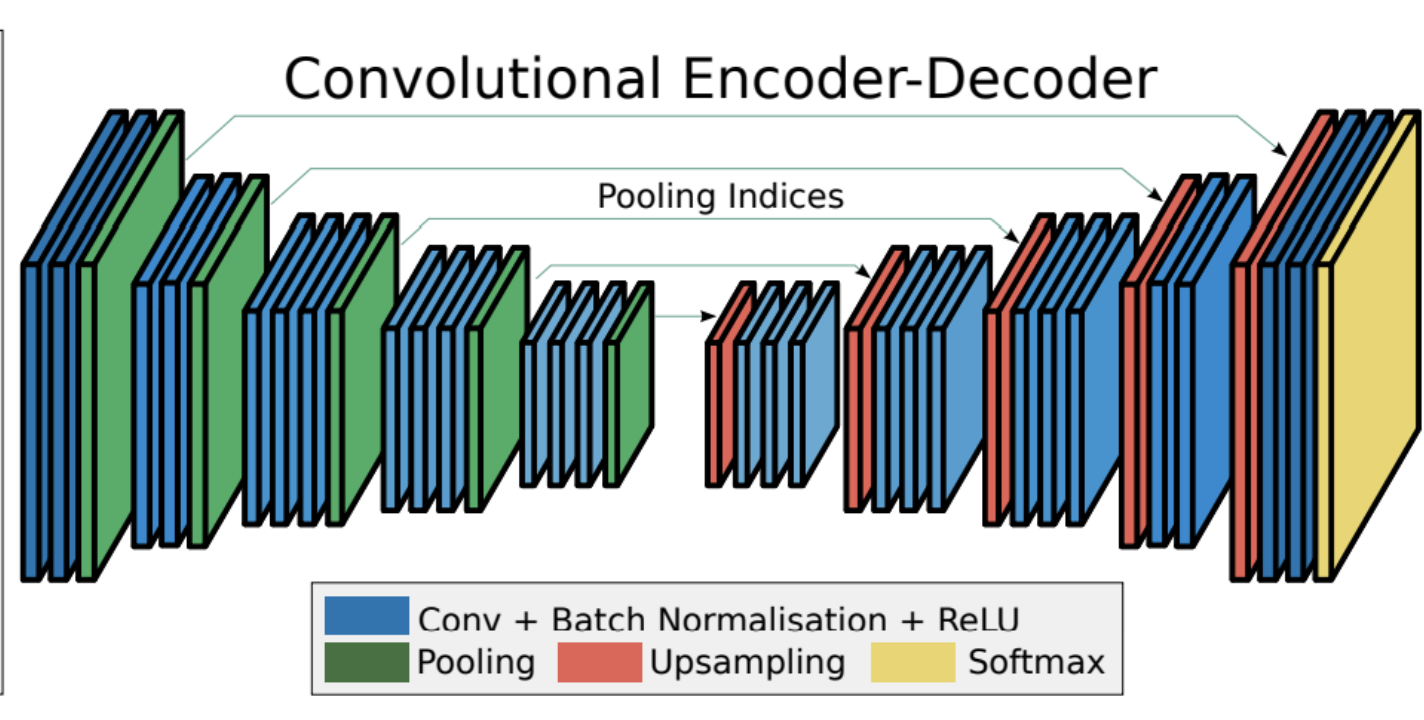

In [9]:
input=Input((256,256,3))

#this is the encoder layer
#lets wrap them under the encoder layer
conv_1=Conv2D(128,3,activation='relu',padding='same')(input)
conv_2=Conv2D(128,3,activation='relu',padding='same')(conv_1) #256x256x128
maxpool_1=MaxPool2D()(conv_2) #128,128,128

conv_3=Conv2D(64,3,activation='relu',padding='same')(maxpool_1)
conv_4=Conv2D(64,3,activation='relu',padding='same')(conv_3) #128x128x64
maxpool_2=MaxPool2D()(conv_4)#64x64x64

conv_5=Conv2D(32,3,activation='relu',padding='same')(maxpool_2)
conv_6=Conv2D(32,3,activation='relu',padding='same')(conv_5) #64x64x32
maxpool_3=MaxPool2D()(conv_6)#32x32x32

conv_7=Conv2D(16,1,activation='relu',padding='same')(maxpool_3)
conv_8=Conv2D(16,1,activation='relu',padding='same')(conv_7) #32x32x16
maxpool_4=MaxPool2D()(conv_8)#16x16x16

conv_9=Conv2D(8,1,activation='relu',padding='same')(maxpool_4)
conv_10=Conv2D(8,1,activation='relu',padding='same')(conv_9) #16x16x8
maxpool_5=MaxPool2D()(conv_10)#8x8x8

#now we pack the decoder layer

#here we unpool what we get from the maxpool layer , basically in place of concatenating the feature vectors
#we would be sending the shorter version from the maxpool layer , and then we upsample them
unpool_1=max_unpool_2d(maxpool_5) #16x16x8
conv_11=Conv2D(16,1,activation='relu',padding='same')(unpool_1)
conv_12=Conv2D(16,1,activation='relu',padding='same')(conv_11) #16x16x16

upsample_1=UpSampling2D()(conv_12) #32x32x16

unpool_2=MaxUnpool2D()(maxpool_4)

add_layer=Add()([upsample_1,unpool_2])
conv_13=Conv2D(32,1,activation='relu',padding='same')(add_layer)
conv_14=Conv2D(32,1,activation='relu',padding='same')(conv_13)

upsample_2=UpSampling2D()(conv_14)

unpool_3=MaxUnpool2D()(maxpool_3)

add_layer_2=Add()([upsample_2,unpool_3])
conv_15=Conv2D(64,1,activation='relu',padding='same')(add_layer_2)
conv_16=Conv2D(64,1,activation='relu',padding='same')(conv_15)




















#now lets wrap the decoder model

model=Model(inputs=input,outputs=conv_16)

model.summary()






TypeError: Cannot iterate over a Tensor with unknown first dimension.